<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

## Binomial Distribution

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">In a library 50 books are selected at random.On an average 1 out of 10 books is a statistics book. .

i) Probability of getting exactly 3 statistics book.

ii) Probability of getting atleast 3 statistics book.

iii) Probability of getting atmost 3 statistics book.

iv) Probability of getting between 3 and 10 statistics book.



In [2]:
# i) Probability of getting exactly 3 statistics book
n=50  
p=0.1
x=3
stats.binom.pmf(x,n,p)  # x,n,p

0.13856514960695693

In [3]:
# ii) Probability of getting atleast 3 statistics book
1- stats.binom.cdf(2,n,p)

0.8882712436536526

In [4]:
# iii) Probability of getting atmost 3 statistics book- [0-3]
stats.binom.cdf(3,n,p)

0.2502939059533075

In [5]:
# iv Probability of getting between 3 and 10 statistics book -[4,5,6,7,8,9]
stats.binom.cdf(9,n,p) - stats.binom.cdf(3,n,p)


0.725168158342101

# Normal Distribution

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">The piston pressure in a randomly selected bike is normally distributed with mean value of 28 psi and standard deviation of 0.7 psi.


What is the probability that the pressure for a randomly selected piston:

(a) between 25 and 29 psi 

(b) less than 30 psi

(c) greater than 30.5 psi  

In [17]:
# (a) between 25 and 29 psi 

mu=28
sigma=0.7
z1= (25-mu)/sigma
z2= (29-mu)/sigma
stats.norm.cdf(z2)-stats.norm.cdf(z1)

0.9234271668415907

In [18]:
# (b) less than 30 psi
mu=28
sigma=0.7
z1= (30-mu)/sigma
stats.norm.cdf(z1)

0.9978626330199137

In [19]:
# (b) greater than 30.5 psi
mu=28
sigma=0.7
z1= (30.5-mu)/sigma
1- stats.norm.cdf(z1)

0.00017751969037349546

<a id="CLT"></a>
#  Central Limit Theorem

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. The central limit theorem states that, for sufficiently large n, the sample mean $\overline{X}$ follows an approximately normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

i.e. $\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a standard normal distribution.

For a normally distributed population, the above result holds for any sample size.

For the population with distribution other than normal, generally, the sample size greater than or equal to 30 is considered as the large sample size.

Consider a population with mean $\mu$ and standard deviation $\sigma$. Let us take a sample of `n` observations from the population such that, $n \geq 30$. The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

# Population with no skewness(Normal population)

C:\Users\Sekhar\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

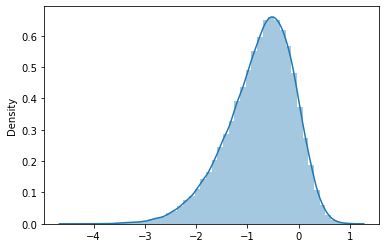

In [101]:
pop = stats.skewnorm.rvs(a=-3,size=100000,random_state=0)  # a-skew
sns.distplot(pop)

    # a => -ve = left skewed
    # a => +ve = right skewed

C:\Users\Sekhar\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

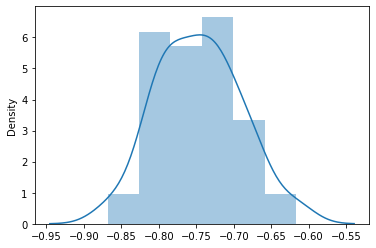

In [102]:
sample_size = 100
no_of_samples = 50
samp_mean_list= []
for i in range(no_of_samples):   
    sample = np.random.choice(pop,size = sample_size,replace = False)
    sample_mean = np.mean(sample) # calculating sample mean
    samp_mean_list.append(sample_mean)
sns.distplot(samp_mean_list)

<a id="pt"></a>
##  Point Estimation

This method considers a single value (sample statistic) as the population parameter. 

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. <br>
The point estimation method estimates the population mean, $\mu = \overline{X}$, where $\overline{X}$ is the sample mean and population standard deviation, $\sigma = s$, where $s$ is the standard deviation of the sample .

<a id="err"></a>
### 2.1.1 Sampling Error

Sampling error is considered as the absolute difference between the sample statistic used to estimate the parameter and the corresponding population parameter. Since the entire population is not considered as the sample, the values of mean, median, quantiles, and so on calculated on sample differ from the actual population values. 

One can reduce the sampling error either by increasing the sample size or determining the optimal sample size using various methods.

### Example:

#### 1. Consider the data for the number of ice-creams sold per day. An ice-cream vendor collected this data for 90 days and then a sample is drawn (without replacement) containing ice-creams sold for 25 days. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 
        25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91, 94, 49, 57, 83, 96, 55, 
        79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 
        68, 75, 16, 33, 31, 99, 22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 
        90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]
        
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

Comupte the sampling error for mean.

In [8]:
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 
        25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91, 94, 49, 57, 83, 96, 55, 
        79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 
        68, 75, 16, 33, 31, 99, 22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 
        90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

np.mean(data)-np.mean(sample)

-3.1000000000000014

<a id="int"></a>
## 2.2 Interval Estimation for Mean

This method considers the range of values in which the population parameter is likely to lie. The confidence interval is an interval that describes the range of values in which the parameter lies with a specific probability. It is given by the formula,<br> <p style='text-indent:20em'> `conf_interval = sample statistic ± margin of error`</p>

The uncertainty of an estimate is described by the `confidence level` which is used to calculate the margin of error. 

<a id="large"></a>
### 2.2.1 Interval Estimation with Z stat

Here the standard deviation of the population is known.The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$\sigma$: Population Standard deviation <br>
$n$: Sample size

In [11]:
df = pd.DataFrame({'alpha':[10,5,2,1],'Z_alpha_by_2':[1.6449,1.9600,2.3263,2.5758]})
df

,alpha,Z_alpha_by_2
0,10,1.6449
1,5,1.9600
2,2,2.3263
3,1,2.5758


In [12]:
stats.norm.cdf(1)-stats.norm.cdf(-1)

0.6826894921370859

In [14]:
stats.norm.cdf(2)-stats.norm.cdf(-2)

0.9544997361036416

In [13]:
stats.norm.cdf(3)-stats.norm.cdf(-3)

0.9973002039367398

In [18]:
stats.norm.isf(0.025)

1.9599639845400545

In [19]:
x_bar = 8
sigma = 2
n = 20
z = stats.norm.isf(0.025)

In [25]:
ul = x_bar + z * (sigma/(n**0.5))
Ll = x_bar - z * (sigma/(n**0.5))
print(ul,Ll)

8.876522540576582 7.123477459423418


In [27]:
# syntax
# stats.norm.interval (loc = x_bar,scale = sigma/root n, alpha = confidence level)
# only here alpha means confidence level for calculating corresponding significance level
# used to calculate confidence interval
stats.norm.interval(loc =x_bar,scale = sigma/(n**0.5),alpha = 0.95)

(7.123477459423419, 8.876522540576582)

To calculate the confidence interval with 95% confidence, use the Z-value corresponding to `alpha = 0.05`. 

### Example:

#### 1. A random sample of weight (in kg.) for 35 diabetic patients is drawn from the population with a standard deviation of 8 kg. Find the 90% confidence interval for the population mean.

    Weight: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
             92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [33]:
Weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
         92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [34]:
sigma = 8
n = 35
x_bar = np.mean(Weight)
stats.norm.interval(loc =x_bar,scale = sigma/(n**0.5),alpha = 0.90)

(74.46146621975642, 78.90996235167215)

#### Practice

2. There are 150 apples on a tree. You randomly choose 40 apples and found that the average weight of apples is 182 grams with a population standard deviation of 30 grams. Find the 95% confidence interval for the population mean.

In [35]:
n = 40
x_bar = 182
sigma = 30
stats.norm.interval(loc =x_bar,scale = sigma/(n**0.5),alpha = 0.95)

(172.70307451543158, 191.29692548456842)

#### 3. A movie production house needs to estimate the average monthly wage of the technical crew members. The previous data shows that the standard deviation of the wages is 190 dollars. The production team thinks that the estimation of the average wage should not exceed 54 dollars. The team has decided to take a small subset of wages for the estimation. Find a suitable number of wages to be considered to get the estimate with 90% confidence.

In [39]:
sigma = 190
ME = 54
CI = 0.90
z = stats.norm.isf(0.05)  # calculating z from confidence level
n = ((z*sigma)/ME)**2     # calculating the number of samples using the formula..
round(n)

33

<a id="small"></a>
### 2.2.2  Interval Estimation with t stat

Here the standard deviation of the population is unknown. The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$s$: Sample standard deviation<br>
$n-1$: degrees of freedom

The ratio $\frac{s}{\sqrt{n}}$ is the estimate of the standard error of the mean. And $t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$ is the margin of error for the estimate.

The value of $t_{\frac{\alpha}{2}, n-1}$ for different $\alpha$ values can be obtained using the `stats.t.isf()` from the scipy library.  

### Example:

#### 1. In a apple tree, you randomly choose 17 apples and found that the average weight of apples is 78 grams with a standard deviation of 23 grams. Find the 90% confidence interval for the population mean.

In [49]:
import math
n = 17
x_bar = 78
S = 23
cl = 0.90
t = stats.t.isf(0.05,df=n-1)

In [50]:
ll = x_bar-(t*S/n**0.5)
ul = x_bar+(t*S/n**0.5)
print(ll,ul)

68.26090326067306 87.73909673932694


In [51]:
# syntax : stats.t.interval(loc = x_bar,scale = S/roon (n),alpha = confidenceleve,df = n-1)
stats.t.interval(loc = x_bar,scale = S/(n**0.5),alpha = cl,df = n-1)

(68.26090326067306, 87.73909673932694)

### Practice:

#### 1. In a class.  randomly 15 students are selected and found that the average weight of height is 145 cm with a standard deviation of 10cm. Find the 95% confidence interval for the population mean.

In [60]:
stats.t.interval(loc = 145 ,scale = 10/(m.sqrt(15)),alpha = 0.95,df = 14)

(139.4621845843536, 150.5378154156464)

<a id="prop"></a>
## 2.3 Interval Estimation for Proportion

Consider a population in which each observation is either a success or a failure. The population proportion is denoted by `P` which the ratio of the number of successes to the size of the population.

The confidence interval for the population proportion with $100(1-\alpha)$% confidence level is given as: $p \pm Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$

Where, <br>
$p$: Sample proportion<br>
$\alpha$: Level of significance<br>
$n$: Sample size

The quantity $Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$ is the margin of error.

### Example:

#### 1. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Construct a 99% confidence interval to estimate the population proportion.

In [106]:
prop = 8/13
cl = 0.99
n = 13
z = stats.norm.isf(0.01/2) 
# http://localhost:8888/notebooks/SEKHAR_GL/STATISTICS/STAT%20-%20Day-2%20mrng%20Before_Session.ipynb#1.-A-financial-firm-has-created-50-portfolios.-From-them,-a-sample-of-13-portfolios-was-selected,-out-of-which-8-were-found-to-be-underperforming.-Construct-a-99%-confidence-interval-to-estimate-the-population-proportion.

In [107]:
ll = prop-(z * m.sqrt(prop*(1-prop)/n))
ul = prop+(z * m.sqrt(prop*(1-prop)/n))
print(ll,ul)

0.26782280814713794 0.962946422622093


In [89]:
stats.norm.interval(loc = prop,scale = m.sqrt(prop*(1-prop)/n),alpha = cl)

(0.26782280814713805, 0.9629464226220927)

### Practice:

#### 1. A survey is taken for the preference of work from home. A sample of 60  was selected, out of which 42 were opting work from home. Construct a 99% confidence interval to estimate the population proportion.

In [92]:
p = 42/60
cl = 0.99
n = 60
stats.norm.interval(loc =p,scale = m.sqrt((prop*(1-prop))/n),alpha = cl)

(0.5382187831229905, 0.8617812168770094)

In [2]:
stats.norm.interval(loc =67,scale = 12/(50**0.5),alpha = 0.90)

(64.20859083117598, 69.79140916882402)

<a id="defn"></a>
# 3. Test of Hypothesis

It is the process of evaluating the validity of the claim made using the sample data obtained from the population. A statistical test is a rule used to decide the acceptance or rejection of the claim.

**Examples of hypothesis:**

        1. One can get 'A' grade if the attendance in the class is more than 75%.
        2. A probiotic drink can improve the immunity of a person. 

<a id="types"></a>
## 3.1 Types of Hypothesis

`Null Hypothesis`: The null hypothesis is the claim suggesting 'no difference'. It is denoted as H<sub>0</sub>.

`Alternative Hypothesis`: It is the hypothesis that is tested against the null hypothesis. The acceptance or rejection of the hypothesis is based on the likelihood of H<sub>0</sub> being true. It is denoted by H<sub>a</sub> or H<sub>1</sub>.



<a id="test_type"></a>
# 4. Types of Test

The hypothesis test is used to validate the claim given by the null hypothesis. The types of tests are based on the nature of the alternative hypothesis. 

<a id="2tailed"></a>
## 4.1 Two Tailed Test

Two tailed test considers the value of the population parameter is less than or greater than (i.e. not equal) a specific value. <br>
If we test the population mean ($\mu$) with a specific value ($\mu_{0}$) the null hypothesis is: $H_{0}: \mu = \mu_{0}$. 

The alternative hypothesis for the two tailed test is given as: $H_{1}: \mu \neq \mu_{0}$

#### Example:

A company that produces tennis balls claimed that the diameter of a tennis ball is 2.625 inches on average. To test the company's claim, a statistical test can be performed considering the hypothesis:

                    

<a id="1tailed"></a>
## 4.2 One Tailed Test

One tailed test considers the value of the population parameter is less than or greater than (but not both) a specific value. <br>
If we test the population mean ($\mu$) with a specific value ($\mu_{0}$) the null hypothesis is: $H_{0}: \mu \leq \mu_{0}$ and the alternative hypothesis is $H_{1}: \mu > \mu_{0}$, the one tailed test is also known as a `right-tailed test`.

If we test the population mean ($\mu$) with a specific value ($\mu_{0}$) the null hypothesis is: $H_{0}: \mu \geq \mu_{0}$ and the alternative hypothesis is $H_{1}: \mu < \mu_{0}$, the one tailed test is also known as a `left-tailed test`.


### Example:

**1.** The company's annual quality report of machines states that a lathe machine works efficiently at most for 8 months on average after the servicing. The production manager claims that after the special tuxan servicing, the machine works efficiently for more than 8 months. To test the claim of production manager consider the hypothesis:

                    Null Hypothesis: Machine efficiency ≤ 8 months
                    Alternative Hypothesis: Machine efficiency > 8 months

This is the example of a **right-tailed test**. 

**2.** A railway authority claims that all the trains on the Chicago-Seattle route run with a speed of at least 54 mph on average. A customer forum declares that there are various records from passengers claiming that the speed of the train is less than what railway has claimed. In this scenario, a statistical test can be performed to test the claim of customer forum considering the hypothesis:

                    Null Hypothesis: Speed ≥ 54 mph
                    Alternative Hypothesis: Speed < 54 mph

This is the example of a **left-tailed test**. 

<a id="eg"></a>
# 5. Hypothesis Tests with Z Statistic

Let us perform one sample Z test for the population mean. We compare the population mean with a specific value. The sample is assumed to be taken from a population following a normal distribution.

To check the normality of the data, a test for normality is used. The `Shapiro-Wilk Test` is one of the methods used to check the normality. The hypothesis of the test is given as:
<p style='text-indent:25em'> <strong> H<sub>0</sub>:  The data is normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  The data is not normally distributed </strong> </p>

The `shapiro()` from scipy library performs a Shapiro-Wilk normality test. 

The null and alternative hypothesis of Z-test is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu = \mu_{0}$ or $\mu \geq \mu_{0}$ or $\mu \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu \neq \mu_{0}$ or $\mu < \mu_{0}$ or $\mu > \mu_{0}$</strong></p>

Consider a normal population with standard deviation $\sigma$. Let us take a sample of size n, 
The test statistic for one sample Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{\overline{X} -  \mu}{\frac{\sigma}{\sqrt(n)}}$</strong></p>

Where, <br>
$\overline{X}$: Sample mean<br>
$\mu$: Specified mean<br>
$\sigma$: Population standard deviation<br>
$n$: Sample size





### Example:

#### 1. A car manufacturing company claims that the mileage of their new car is 25 kmph with a standard deviation of 2.5 kmph. A random sample of 45 cars was drawn and recorded their mileage as per the standard procedure. From the sample, the mean mileage was seen to be 24 kmph. Is this evidence to claim that the mean mileage is 25kmph? (assume the normality of the data) Use α = 0.01.

In [ ]:
# step1 checking the assumptions
# data is normal
# population std is known
# it is evident that its one sample z test   (large sample)

In [ ]:
#step2 : hypothes is formation
# Ho : mu = 25
#Ha : mu != 25

In [ ]:
# step 3 : which direction test?
# two tail Z test

In [3]:
# step 4 : calculating test statistics
# mu - population
# x_bar - sample
x_bar = 24
mu = 25
sigma = 2.5
n = 45
z_stat = (x_bar - mu)/(sigma / np.sqrt(n))
print(z_stat)

-2.6832815729997477


In [7]:
# step 5 : calculating p value
p_val = stats.norm.sf(abs(z_stat))* 2
p_val

0.007290358091535638

In [11]:
# inferences / conclusion
alpha = 0.01
p_value = p_val
if p_val < alpha:
    print(" Null hypothesis is rejected")
else:
    print("failed to reject the null hypothesis")
# since p_val is less than the given significance level it can be rejected

 Null hypothesis is rejected


## Practice:

#### 2. The average calories in a slice bread of the brand 'Alphas' are 82 with a standard deviation of 15. An experiment is conducted to test the claim of the dietitians that the calories in a slice of bread are not as per the manufacturer's specification. A sample of 40 slices of bread is taken and the mean calories recorded are 95. Test the claim of dietitians with ⍺ value (significance level) as 0.05. (assume the normality of the data).

In [ ]:
# step1 : 
# population std is known, 
# data is normal
# its evident that its z test 



In [ ]:
# step 2 : framing hypothesis
# Ho : mu = 82
# Ha : mu != 95

In [ ]:
# step3 : direction of the test
# two tail z test

In [16]:
# step4 : calculating test statstics

# mu - population
# x_bar - sample

sigma = 15
n = 40
mu = 82
x_bar = 95
z_stat = (x_bar - mu)/(sigma / np.sqrt(n))
print(z_stat)

5.4812812776251905


In [17]:
# step 5 : calculating p value
p_bread = stats.norm.sf(abs(z_stat))* 2
round(p_bread)

0

In [22]:
#inferences/ conclusion 
# inferences / conclusion
alpha = 0.05
p_value = p_bread
if p_val < alpha:
    print(" Null hypothesis is rejected")
else:
    print("failed to reject the null hypothesis")
# since p_val is less than the given significance level it can be rejected

 Null hypothesis is rejected


#### 3. A typhoid vaccine in the market inscribes 3 mg of ascorbic acid in the vaccine with standard deviation of 1.2mg . The team claims that the vaccines contain less than 3 mg of acid. We collected the data of 40 vaccines by using random sampling from a population and recorded the amount of ascorbic acid. Test the claim of the team using the sample data ⍺ value (significance level) to 0.05.Assume Data is normal

    acid_amt = [2.57, 3.06, 3.28 , 3.24, 2.79, 3.40, 3.36, 3.07, 2.46, 3.03, 3.05, 2.94, 3.46, 3.19, 3.09, 2.81, 3.13, 2.88, 
                2.76, 2.75, 3.17, 2.89, 2.54, 3.18, 3.08, 2.60, 3.06, 3.13, 3.11, 3.08, 2.93, 2.90, 3.06, 2.97, 3.24, 2.86, 
                2.87, 3.18, 3, 2.95]

In [23]:
acid_amt = [2.57, 3.06, 3.28 , 3.24, 2.79, 3.40, 3.36, 3.07, 2.46, 3.03, 3.05, 2.94, 3.46, 3.19, 3.09, 2.81, 3.13, 2.88, 
            2.76, 2.75, 3.17, 2.89, 2.54, 3.18, 3.08, 2.60, 3.06, 3.13, 3.11, 3.08, 2.93, 2.90, 3.06, 2.97, 3.24, 2.86, 
            2.87, 3.18, 3, 2.95]

In [25]:
# null hypothesis Ho = mu <=3
# ha mu >3
sigma = 1.2
n = 40
x_bar = np.mean(acid_amt)
mu = 3

In [26]:
z_stat = (x_bar - mu)/(sigma/np.sqrt(n))
z_stat

0.015811388300842496

In [30]:
p_vac = stats.norm.sf(z_stat)
p_vac

0.493692431511398

In [31]:
alph = 0.05
p_vac < 0.05

False

In [ ]:
# since p_val is not less than sigmificance level we failt o reject the null hypothesis..
# concluding the level of acid in vaccine is less than 3 mg

## Practice

#### 4. A sample of 900 PVC pipes is found to have an average thickness of 12.5 mm. The sample is coming from a normal population. Is there any evidence that pvc pipe thickeness is less than 13 mm. The population standard deviation is 1 mm. Test the hypothesis at 5% level of significance.

In [37]:
mu = 13
x_bar = 12.5
sigma = 1
n = 900
# ho : mu >= 13
# ha mu < 13
z_stat = (x_bar - mu)/(sigma / np.sqrt(n))
print(z_stat)

-15.0


In [42]:
p_pipe = stats.norm.cdf(z_stat)
p_pipe

3.6709661993126986e-51

In [44]:
p_pipe < 0.05
# since p_val less than significance we reject h0 concludin the thickness of pipe is less than 13

True

<a id="2z"></a>
## 2.2 Two Sample Z Test

Let us perform a two sample Z test for the population mean. We compare the means of the two independent populations. The samples are assumed to be taken from populations such that they follow a normal distribution. Also, the sample must have equal variance.

The `Shapiro-Wilk Test` is used to check the normality of the data. The assumption of equal variances of the populations is tested using the `Levene's Test`. 
The hypothesis of the Levene's test is given as:
<p style='text-indent:25em'> <strong> H<sub>0</sub>:  The variances are equal</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  The variances are not equal </strong> </p>

The `levene()` from scipy library performs a Levene's test. 

The null and alternative hypothesis of two sample Z-test is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>



The test statistic for two sample Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{(\overline{X_{1}} - \overline{X_{2}})  - \mu_{0}} {\sqrt{\frac{\sigma_{1}^{2}}{n_{1}} + \frac{\sigma_{2}^{2}}{n_{2}}}}$</strong></p>

Where, <br>
$\overline{X_{1}}$, $\overline{X_{2}}$ : Mean of both the samples<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$\sigma_{1}, \sigma_{2}$: Standard deviation of both the populations<br>
$n_{1}, n_{2}$: Size of samples from both the populations




#### 1. A study was carried out to understand amount of haemoglobin in blood for males and females. A random sample of 160 males and 180 females have means of 13 g/dl and 15 g/dl. The two population have standard deviation of 4.1 g/dl for male donors and 3.5 g/dl for female donor . Can it be said the population means of concentrations of the elements are the same for men and women? Use  α = 0.01.Assume data is normally distributed

In [45]:
# conditions: data is normal
# pop std is known
# 2 samples

# two sample z test


In [ ]:
# hypothesis: 
# Ho: mu1 = mu2 or mu1-mu2 = 0
# Ha : mu1 != mu2 or mu1 - mu2 != 0

In [ ]:
# directionsality :
# 2 tail 2 sample Ztest

In [49]:
# we are considering s1 = male and s2 = female
x1_bar = 13
x2_bar = 15
sigma1 = 4.1
sigma2 = 3.5
n1 = 160
n2 = 180
#mu1-mu2 = 0    #(null hypothesis always)
num = ((x1_bar-x2_bar)-(0))
den =np.sqrt((sigma1**2/n1)+ (sigma2**2/n2))
z_stat = num/den
z_stat

-4.806830552525058

In [54]:
pval_2 = stats.norm.sf(abs(z_stat))*2
pval_2

1.5334185117556497e-06

In [55]:
pval_2 < 0.01

True

In [ ]:
#w we reject the hypothesis based on value difference
# 

## Practice

#### 2.  Avergae sales of 25 items in shop A is Rs.15000  with population standard deviation of Rs.2000. Avergae sales of 20 items in shop B is Rs.14000  with population standard deviation of Rs.1500.Perform hypothesis testing to check wether sales in shop A is greater than shop B with 5% significance level? 

In [ ]:
# hypothesis:
# ho : mu1 <= mu2
# ha: mu1 > mu2

In [80]:
x1_bar = 15000
x2_bar = 14000
n1 = 25
n2 = 20
sigma1 = 2000
sigma2 = 1500
mu1 = 0
mu2 = 0
num = ((x1_bar-x2_bar)-(mu1-mu2))
den =np.sqrt((sigma1**2/n1)+ (sigma2**2/n2))
z_stat = num/den

In [81]:
z_stat

1.9156525704423026

In [82]:
p_sale =stats.norm.sf(z_stat)
p_sale

0.02770466665184583

In [84]:
p_sale < 0.05

True

In [ ]:
# since the pvalue is less than significance level we reject the null hypothesis
# concluding that shop a is greater than shop2 


<a id="t"></a>
# 3. t Test

<a id="1t"></a>
## 3.1 One Sample t Test

Let us perform a one sample t-test for the population mean. We compare the population mean with a specific value. 

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu = \mu_{0}$ or $\mu \geq \mu_{0}$ or $\mu \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu \neq \mu_{0}$ or $\mu < \mu_{0}$ or $\mu > \mu_{0}$</strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $t = \frac{\overline{X} -  \mu_{0}}{\frac{s}{\sqrt(n)}}$</strong></p>

Where, <br>
$\overline{X}$: Sample mean<br>
$s$: Sample standard deviation<br>
$n$: Sample size
 
Under $H_{0}$ the test statistic follows a t-distribution with n-1 degrees of freedom.


#### 1. A survey claims that in a math test female students tend to score marks greater than 75. Consider a sample of 24 female students and perform a hypothesis test to check the claim with 90% confidence.

Use the dataset available in the CSV file `mathscore_1ttest.csv`.

In [188]:
df = pd.read_csv('mathscore_1ttest.csv')
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group C,standard,none,60,72,74,206,Nature Learning
1,female,group C,standard,none,59,72,68,199,Nature Learning
2,female,group E,standard,none,100,100,100,300,Speak Global Learning
3,female,group D,standard,none,69,74,74,217,Speak Global Learning
4,female,group A,free/reduced,none,47,59,50,156,Speak Global Learning


In [ ]:
# hypothesis 
# Ho : mu >=75
#Ha mu< 75

In [189]:
female_math = df[df['gender']=='female']['math score']
x_bar = np.mean(female_math)

In [190]:
# test fro normality
#ho : data is normal or skew = 0
# ha :  data is not normal or skew != 0
stats.shapiro(female_math)  # puthon gives the value for two tail test value

ShapiroResult(statistic=0.9368310570716858, pvalue=0.13859796524047852)

In [191]:
0.13859796524047852/2 < 0.05

False

In [ ]:
# since value is not less  than 0.05 we can conclude that data is normal

In [192]:
# hypothesis 
# Ho : mu >=75
#Ha mu< 75

In [ ]:
# t_stat = (x_bar - mu)/(S/np.sqrt(n))

In [193]:
x_bar
S = np.std(female_math,ddof =1)
n = len(female_math)
mu = 75
t_stat = (x_bar - mu)/(S/np.sqrt(n))

In [194]:
t_stat

-3.606738075702319

In [195]:
p_val = stats.t.cdf(t_stat,df=1)
p_val

0.08609168891658113

In [116]:
sig_val = 0.1
p_val<sig_val

True

In [ ]:
#inbuilt function
# syntax : stats.ttest_1samp(sample,pop_mean)

In [123]:
test_stat,p_value = stats.ttest_1samp(female_math,popmean = 75)

In [124]:
p_value = p_value/2
p_value

0.0007426613957678669

In [121]:
test_stat

-3.6067380757023204

#### 2. A researcher is studying the growth of bacteria in waters of Lake Beach. The mean bacteria count of 100 per unit volume of water is within the safety level. The researcher collected 10 water samples of unit volume and found the mean bacteria count to be 94.8 with a sample variance of 72.66. Does the data indicate that the bacteria count is within the safety level? Test at the α = .05 level. Assume that the measurements constitute a sample from a normal population.

In [127]:
# Ho : mu >=100, Ha : mu < 100
mu = 100
x_bar = 94.8
S = 72.66
n = 10
t_stat = (x_bar-mu)/(np.sqrt(S/n))

In [128]:
t_stat

-1.9291040236750068

In [130]:
p_val = stats.t.sf(t_stat,df=n-1)
p_val

0.957102178656725

<a id="2t"></a>
## 3.2 Two Sample t Test (Unpaired)

The two sample t-test is used to compare the means of two independent populations. This test assumes that the populations are normally distributed from which the samples are taken.

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>

Let us take a sample of size ($n_{1}$) from the first population and sample of size ($n_{2}$) from a second independent population. If both $n_{1}$ and $n_{2}$ are less than 30 and standard deviation of populations are unknown. We use two-sample t-test.

Consider the equal variance for both the populations. The test statistic for two sample t-test is given as:
<p style='text-indent:25em'> <strong> $t = \frac{(\overline{X_{1}} - \overline{X_{2}}) - \mu_{0}} {s \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}$</strong></p>

Where, <br>
$\overline{X_{1}}$, $\overline{X_{2}}$: Mean of both the samples<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$s$: Pooled standard deviation<br>
$n_{1}, n_{2}$: Size of samples from both the populations

The pooled standard deviation is defined as:
$s = \sqrt{\frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}}$ $\hspace{2cm}$  Where, $s_{1}, s_{2}$: Standard deviation of both the samples

Under $H_{0}$, the test statistic follows a t-distribution with $(n_{1}+n_{2}-2)$ degrees of freedom.

If the population variances are equal and also the sample size is the same for both the samples then the test statistic is given as:
<p style='text-indent:25em'> <strong> $t = \frac{(\overline{X_{1}} - \overline{X_{2}}) - \mu_{0}} {s \sqrt{\frac{2}{n}}}$</strong></p>

Where the pooled standard deviation $s = \sqrt{\frac{s_{1}^{2} + s_{2}^{2}}{2}}$

Under $H_{0}$, the test statistic follows a t-distribution with $(2n-2)$ degrees of freedom.

If both the population variances and the sample sizes are not equal then the Welch's test is used.

### Example: 

#### 1. The teachers' association claims that the total score of the students who completed the test preparation course is different than the total score of the students who have not completed the course. The sample data consists of 15 students who completed the course and 18 students who have not completed the course. Test the association's claim with ⍺ = 0.05.

Consider the total score of the students who have/ have not completed the preparation course are given in the CSV file `totalmarks_2ttest.csv`.

In [151]:
df = pd.read_csv('totalmarks_2ttest.csv')
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,male,group E,standard,completed,84,83,78,245,Speak Global Learning
1,male,group C,free/reduced,completed,79,77,75,231,Speak Global Learning
2,male,group A,standard,none,91,96,92,279,Nature Learning
3,female,group B,free/reduced,completed,76,94,87,257,Speak Global Learning
4,male,group A,standard,completed,46,41,43,130,Nature Learning


In [ ]:
# Ho : mu1 = mu2
# Ha: mu1 != mu2

In [198]:
df_comp = df[df['test preparation course'] == 'completed']['total score']

In [199]:
# hypothesis
# Ho: data is normal
# Ha : data is not normal
stats.shapiro(df_comp)

ShapiroResult(statistic=0.9131930470466614, pvalue=0.4577338695526123)

In [200]:
0.11574020/2   >= 0.05 # df_ccomp is normal as pvalue is = 0.05

True

In [139]:
df_not_comp = df[df['test preparation course'] == 'none']['total score']

In [147]:
stats.shapiro(df_not_comp)

ShapiroResult(statistic=0.948186457157135, pvalue=0.39728137850761414)

In [201]:
0.397281/2 >=  0.05   # df_not_comp is normal 2 

True

In [149]:
# Ho : data has equal variance
# Ha : data does not have equal variance

stats.levene(df_comp,df_not_comp)

LeveneResult(statistic=0.045113770764648356, pvalue=0.8331854285659768)

In [150]:
0.8331854285659768 >= 0.05  # hence the datas considered has equal variance as value of p > 0.05

True

In [ ]:
# inbuilt function :
# sybtax: stats.ttest_ind(sample_1,sample_2)

In [152]:
stats.ttest_ind(df_comp,df_not_comp)

Ttest_indResult(statistic=1.4385323319823262, pvalue=0.16030339806989594)

## Practice:

1. The teachers' association claims that the total score of Speak Global Learning is greater than the total score of Nature Learning.  Test the association's claim with ⍺ = 0.05.

In [ ]:
# Hypothesis : Ho : mu1 >= mu2
# Ha : mu1< mu2

In [157]:
samp_1 = df[df['training institute'] == 'Speak Global Learning']['total score']
samp_2 = df[df['training institute'] == 'Nature Learning']['total score']

In [158]:
stats.shapiro(samp_1)

ShapiroResult(statistic=0.940517246723175, pvalue=0.26940712332725525)

In [ ]:
# shapiro : Ho : data is normal
# Ha : data is not normal

In [159]:
stats.shapiro(samp_2)

ShapiroResult(statistic=0.960299015045166, pvalue=0.7280198335647583)

In [160]:
stats.ttest_ind(samp_1,samp_2)

Ttest_indResult(statistic=0.9984458677537893, pvalue=0.32579344760218754)

In [163]:
p_val = 0.32579344760218754/2

In [164]:
p_val < 0.05   # hence we fail to reject the sample as p_val is > 0.05

False

<a id="paired"></a>
## 3.3 Paired t Test

A paired t-test is used to compare the mean of the population for two dependent samples. The dependent samples can be the scores before and after a specific treatment. 

Let $X_{i}$ be the sample before the treatment and $Y_{i}$ be the sample after the treatment. Let $\mu_{X}$, $\mu_{Y}$ be the mean of the data X and Y respectively. The mean difference $\mu_{d} = \mu_{Y} - \mu_{X}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu_{d} = \mu_{0}$ or $\mu_{d} \geq \mu_{0}$ or $\mu_{d} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{d} \neq \mu_{0}$ or $\mu_{d} < \mu_{0}$ or $\mu_{d} > \mu_{0}$</strong></p>

The test statistic for paired t-test is given as:
<p style='text-indent:25em'> <strong> $t = \frac{\overline{X_{D}} - \mu_{0}} {\frac{s_{D}}{\sqrt{n}}}$</strong></p>

Where, <br>
$\overline{X_{D}}$: Mean difference between the pairs<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$s_{D}$: Standard deviation of differences between the pairs<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a t-distribution with (n-1) degrees of freedom.

### Example:

#### 1. A training institute wants to check if their writing training program was effective or not. 17 students are selected to check the hypothesis. Consider 0.05 as the level of significance.

The writing scores before and after training are provided in the CSV file `WritingScores.csv`. 

In [168]:
df = pd.read_csv('WritingScores.csv')
df.head()

,score_before,score_after
0,59,50
1,62,67
2,76,92
3,32,75
4,61,98


In [ ]:
# mu1 = before
# mu2 = after

# Ho: mu2 >= mu1
# Ha : mu2 < mu1

In [ ]:
# inbuilt function
# stats.ttest_rel(sample1,sample2)

In [170]:
test_stat,p_val = stats.ttest_rel(df['score_before'],df['score_after'])

In [172]:
p_val =  p_val/2

In [173]:
p_val  # p_val is not less than o.o5 hence we fail to reject the hypothesis

0.08464506448139923

#### 2. An energy drink distributor claims that a new advertisement poster, featuring a life-size picture of a well-known athlete, will increase the product sales in outlets by an average of 50 bottles in a week. For a random sample of 10 outlets, the following data was collected. Test that the null hypothesis that there the advertisement was effective in increasing sales. Test the hypothesis using critical region technique. Use α = 0.05.

Given data:

        sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
        sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

In [174]:
sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

In [ ]:
# hypothesis Ho : mu1 >= mu2
# Ha : mu1 < mu2

In [175]:
test_stat,p_val = stats.ttest_rel(sales_before,sales_after)

In [176]:
p_val/2

0.46107385734626494

In [177]:
np.mean(sales_before)

40.666666666666664

In [178]:
np.mean(sales_after)

40.888888888888886

<a id="prop"></a>
# 4. Z Proportion Test

<a id="1_p"></a>
## 4.1 One Sample Z Proportion Test

Perform one sample Z test for the population proportion. We compare the population proportion ($P$) with a specific value ($P_{0}$).

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P = P_{0}$ or $P \geq P_{0}$ or $P \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P \neq P_{0}$ or $P < P_{0}$ or $P > P_{0}$</strong></p>

The test statistic for proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{p -  P_{0}}{\sqrt{\frac{P_{0}(1-P_{0})}{n}}}$</strong></p>

Where, <br>
$p$: Sample proportion<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a standard normal distribution.

### Example:

#### 1. In previous years, people believed that at most 80% of male students score more than 50 marks out of 100 in Mathematics. Perform a test to check whether this percentage is more than 80. Consider the level of significance as 0.05.

Consider the sample of math scores of male students available in the CSV file `StudentsPerformance.csv`.

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning
2,female,group B,standard,none,64,71,56,191,Nature Learning
3,male,group A,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,standard,none,75,66,51,192,Nature Learning


In [4]:
# Data preparation
mal_grt_50 = df[(df['gender']=='male')&(df['math score']>50)]
mal_grt_50.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
3,male,group A,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,standard,none,75,66,51,192,Nature Learning
7,male,group B,free/reduced,none,74,49,77,200,Nature Learning
10,male,group C,standard,none,82,80,44,206,Nature Learning
11,male,group D,standard,none,58,89,66,213,Nature Learning


In [5]:
# P_samp

p_sam = len(mal_grt_50)/len(df)
print(p_sam)

0.423


In [6]:
# No normality check

In [7]:
# Assumption

# 1) Sample is discrete

In [8]:
# Hypothesis:

# P_sam<p_pop

# Ho:  p_pop >= 0.8
# Ha : p_pop< 0.8

In [9]:
# One sample z proportion - left tailed

In [10]:
ps = len(mal_grt_50)/len(df)
pp=0.8
n = len(mal_grt_50)
num = ps-pp
den = np.sqrt((pp*(1-pp))/n)
zstat = num/den
print(zstat)

-19.384363382633957


In [11]:
# pval:
pval = stats.norm.cdf(zstat)
print(pval)

5.229558370616259e-84


In [12]:
sig_lvl= 0.05
if pval<sig_lvl:
    print('Ha is selected')
else:
    print('Ho is selected')

Ha is selected


In [1]:
# Pop proportion of male scoring greater than 50 is less than 80%

	
### 2. The store manager claims that he received more 20% of defective plastic boxes in his previous order. Test the manager's claim using a critical value method. From a sample of 120 boxes, 42 were found to be defective. Test the claim with 90% confidence.

In [13]:
# The null and alternative hypothesis is:

# H0:  𝑃≤0.2 
# H1:  𝑃>0.2

In [16]:
stats.norm.isf(0.1)

1.2815515655446004

In [17]:
# sample size
n = 120

# number of defective boxes in the sample
x = 42

# sample proportion
p_samp = x / n

# hypothesized proportion
hypo_p = 0.2

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)

print('Test statistic:', z_prop)

Test statistic: 4.107919181288744


In [18]:
p_val = stats.norm.sf(z_prop)

In [19]:
sig_level = 0.1

In [20]:
p_val <  sig_level

True

In [21]:
# We reject the Null Hypothesis

<a id="2_p"></a>
## 4.2 Two Sample Z proportion Test

Perform two sample Z test for the population proportion. We check the equality of population proportions $P_{1}$ and $P_{2}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P_{1} - P_{2} = P_{0}$ or $P_{1} - P_{2} \geq P_{0}$ or $P_{1} - P_{2} \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P_{1} - P_{2} \neq P_{0}$ or $P_{1} - P_{2} < P_{0}$ or $P_{1} - P_{2} > P_{0}$</strong></p>

The test statistic for two sample proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{(p_{1} -  p_{2}) - P_{0}}{\sqrt{\bar{P}(1-\bar{P})(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$   $\hspace{2 cm} \bar{P} = \frac{n_{1}p_{1} + n_{2}p_{2}}{n_{1} + n_{2}}$ </strong></p>

Where, <br>
$p_{1}, p_{2}$: Samples proportions<br>
$P_{0}$: Hypothesized proportion<br>
$\bar{P}$: Proportion of pooled sample<br>
$n_{1}, n_{2}$: Samples sizes

### Example:

#### 1. A team of nutritionists believes that each institute provides 'standard' lunch to an equal proportion of students. A sample of students from institutes <i>Nature Learning</i> and <i>Speak Global Learning</i> is given. Consider the null hypothesis as equality of proportion with 0.1 level of significance.

Consider the sample data available in the CSV file `StudentsPerformance.csv`.

In [43]:
# type your code here

In [22]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning
2,female,group B,standard,none,64,71,56,191,Nature Learning
3,male,group A,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,standard,none,75,66,51,192,Nature Learning


In [23]:
# Assumption
# 1. Sample is discrete
# 2. 2 sample
# 2 sample z proportion

In [24]:
# 1 - Nature Learning
# 2 - Speak Global Learning

# Ho : P1=P2
# Ha : P1!=P2

In [25]:
# Test - 2 sample z proportion two tailed

In [32]:
totat_nl = len(df[df['training institute']=='Nature Learning']) # NAture leanring count
totat_sgl = len(df[df['training institute']=='Speak Global Learning']) # Speak Global Learning
print(totat_nl,totat_sgl)

500 500


In [33]:
std_nl = len(df[(df['training institute']=='Nature Learning')&(df['lunch']=='standard')]) # Nature Learning standard lunc
std_sgl = len(df[(df['training institute']=='Speak Global Learning')&(df['lunch']=='standard')]) # Speak Global Learning standard lunc
print(std_nl,std_sgl)


329 317


In [31]:
#proportion.proportions_ztest(count = success count ,nobs = total count)

In [38]:
# default - two sided probability

zstat,twosid_pval = proportion.proportions_ztest(count = [std_nl,std_sgl], nobs =[totat_nl,totat_sgl])
print(zstat,twosid_pval)

0.7935300106078008 0.4274690915859791


In [39]:
sig_lvl= 0.1
if twosid_pval<sig_lvl:
    print('Ha is selected')
else:
    print('Ho is selected')

Ho is selected


In [15]:
# The proportion of standard lunch is equal to NL and SGL

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>2. The HR head of a company claims that the company supports the woman empowerment and the proportion of female employees is same in the New York and Oneonta branches. The women empowerment cell wants to check whether the proportion is different for the two branches. The sample of 150 employees is selected from New York branch out of which 53 are females and a sample of 170 employees is selected from Oneonta branch out of which 76 are females. Use the p-value technique with 95% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us consider the population proportion of females in New York branch be `P_1` and the population proportion of females in the Oneonta branch be `P_2`.   

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} = P_{2}$<br>
H<sub>1</sub>: $P_{1} \neq P_{2}$ 

In [42]:
# number of employees selected from New York branch
NY_emp = 150

# number of employees selected from Oneonta branch
One_emp = 170

# number of female employees in New York branch sample
NY_female = 53

# number of female employees in Oneonta branch sample
One_female = 76

# calculate test statistic value for two sample proportion test
# pass the number of females from both the branches to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
# pass the two-tailed condition to the parameter, 'alternative'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([NY_female, One_female]), 
                                             nobs = np.array([NY_emp, One_emp]),  
                                             alternative = 'two-sided')

# print the p-value
print('p-value:', p_val)

p-value: 0.08807228185564836


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. The education department claims that the proportion of students failed in Mathematics is more than the proportion of students failed in English. To test the claim a sample of 200 students enrolled for Mathematics was considered out of which 73 students failed in the exam and a sample of 150 students enrolled for English was considered out of which 53 students failed in the exam. Use the critical value method to test the department's claim with 90% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us consider the population proportion of students failed in Mathematics be `P_1` and the population proportion of students failed in English be `P_2`.   

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} \leq P_{2}$<br>
H<sub>1</sub>: $P_{1} > P_{2}$ 

Here ⍺ = 0.1, for a one-tailed test calculate the critical z-value.

In [43]:
# calculate the z-value for 90% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.1), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.28


i.e. if z is greater than 1.28 then we reject the null hypothesis.

In [44]:
# number of students enrolled for Mathematics
n_math = 200

# number of students enrolled for English
n_eng = 150

# number of students failed in Mathematics
fail_math = 73

# number of students failed in English
fail_eng = 53

# calculate test statistic value for two sample proportion test
# pass the number of students failed in subjects to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
# pass the one-tailed condition to the parameter, 'alternative'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([fail_math, fail_eng]), 
                                             nobs = np.array([n_math, n_eng]),  
                                             alternative = 'larger')

# print the test statistic
print('Test statistic:', z_prop)

Test statistic: 0.22502571869471721


In [45]:
p_val

0.41097963333926457

In [46]:
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([fail_math, fail_eng]), 
                                             nobs = np.array([n_math, n_eng]))

In [47]:
p_val/2

0.41097963333926457

Here the test statistic is less than 1.28. Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that the  proportion of students failed in Mathematics is not more than the proportion of students failed in English.